# Diagnostic

In [2]:
# packages
import numpy as np
import pandas as pd
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()) + '/source')
import pickle
# from supportfunctions import PDESolver_2d, finiteDiff
from solver_2d import false_transient_one_iteration_python
from numba import njit
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import bicg
# from derivative import derivatives_2d, derivative_1d
import SolveLinSys
import time
# from solver_ode import solve_ode, solve_ode_one
# from solver_jump import approach_one, solve_smooth
# from solver import pde_solve
from scipy import interpolate
import matplotlib.pyplot as plt
import matplotlib as mpl
from multiprocessing import Pool
import numpy as np
import matplotlib as mpl
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams["figure.edgecolor"] = "w"
mpl.rcParams['figure.facecolor'] = "w"
mpl.rcParams["savefig.dpi"] = 300
mpl.rcParams["legend.frameon"] = False

In [3]:
e_list_1 = np.load("e_list_1.npy")
v_list_1 = np.load("v_list_1.npy")

In [4]:
e_list_2 = np.load("e_list_2.npy")
v_list_2 = np.load("v_list_2.npy")

In [5]:
e_list_5 = np.load("e_list_5.npy")
v_list_5 = np.load("v_list_5.npy")

In [6]:
e_list_10 = np.load("e_list_10.npy")
v_list_10 = np.load("v_list_10.npy")

In [7]:
e_list_20 = np.load("e_list_20.npy")
v_list_20 = np.load("v_list_20.npy")

In [8]:
e_list_30 = np.load("e_list_30.npy")
v_list_30 = np.load("v_list_30.npy")

In [9]:
import matplotlib.pyplot as plt

In [10]:
y1_step = .04
y1_grid = np.arange(0., 4., y1_step)

y2_step = .001
y2_grid = np.arange(0., .05, y2_step)

(y1_mat, y2_mat) = np.meshgrid(y1_grid, y2_grid, indexing = 'ij')
stateSpace = np.hstack([y1_mat.reshape(-1,1, order='F'), y2_mat.reshape(-1,1,order='F')])
hy1 = y1_grid[1] - y1_grid[0]
hy2 = y2_grid[1] - y2_grid[0]
n_y1 = len(y1_grid)
n_y2 = len(y2_grid)

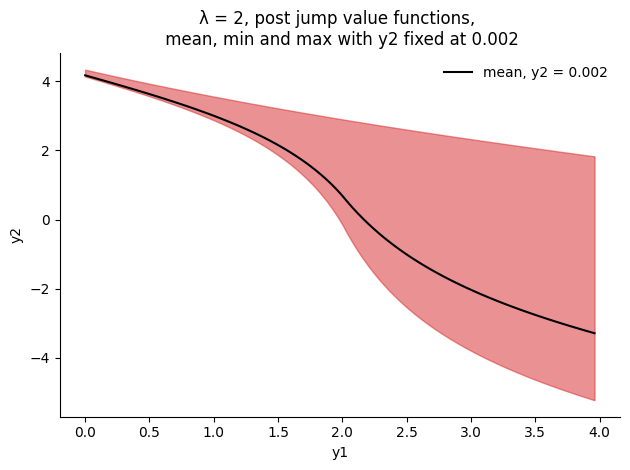

In [11]:
plt.plot(y1_grid, np.mean(v_list_2[:, :, 2], axis=0), color="black", label="mean, y2 = {}".format(y2_grid[2]))
plt.fill_between(y1_grid, np.max(v_list_2, axis=0)[:, 2], np.min(v_list_2, axis=0)[:, 2], color="tab:red", alpha=0.5)
plt.title("λ = 2, post jump value functions, \n mean, min and max with y2 fixed at {}".format(y2_grid[2]))
plt.xlabel("y1")
plt.ylabel("y2")
plt.legend()
plt.tight_layout()
# plt.savefig("v_2")
plt.show()

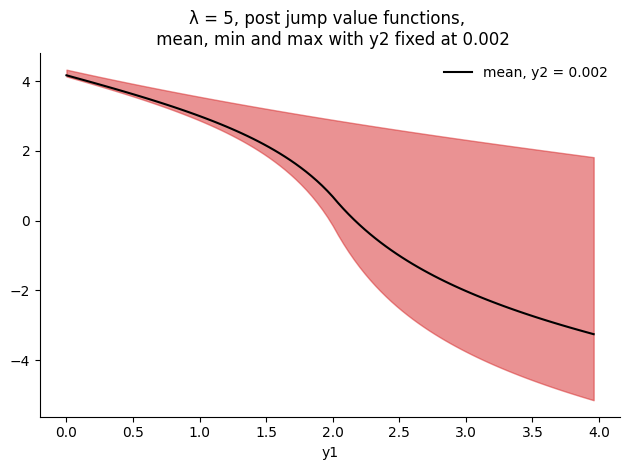

In [12]:
plt.plot(y1_grid, np.mean(v_list_5[:, :, 2], axis=0), color="black", label="mean, y2 = {}".format(y2_grid[2]))
plt.fill_between(y1_grid, np.max(v_list_5, axis=0)[:, 2], np.min(v_list_5, axis=0)[:, 2], color="tab:red", alpha=0.5)
plt.title("λ = 5, post jump value functions, \n mean, min and max with y2 fixed at {}".format(y2_grid[2]))
plt.xlabel("y1")
# plt.ylabel("y2")
plt.legend()
plt.tight_layout()
# plt.savefig("v_5")
plt.show()

In [13]:
plt.plot(y1_grid, np.mean(v_list_10[:, :, 2], axis=0), color="black", label="mean, y2 = {}".format(y2_grid[2]))
plt.fill_between(y1_grid, np.max(v_list_10, axis=0)[:, 2], np.min(v_list_10, axis=0)[:, 2], color="tab:red", alpha=0.5)
plt.title("λ = 10, post jump value functions,\n mean, min and max with y2 fixed at {}".format(y2_grid[2]))
plt.xlabel("y1")
plt.ylabel("y2")
plt.tight_layout()

# plt.savefig("v_10")
plt.legend()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (100,) and (200,)

In [14]:
plt.plot(y1_grid, np.mean(v_list_2[:, :, 2], axis=0), label="λ = 2")
plt.plot(y1_grid, np.mean(v_list_5[:, :, 2], axis=0), label="λ = 5")
plt.plot(y1_grid, np.mean(v_list_10[:, :, 2], axis=0), label="λ = 10")
plt.legend()
plt.xlabel("y1")
plt.title("value functions,  y2 fixed at {}".format(y2_grid[2]))
plt.tight_layout()
# plt.savefig("vs")
plt.show()

ValueError: x and y must have same first dimension, but have shapes (100,) and (200,)

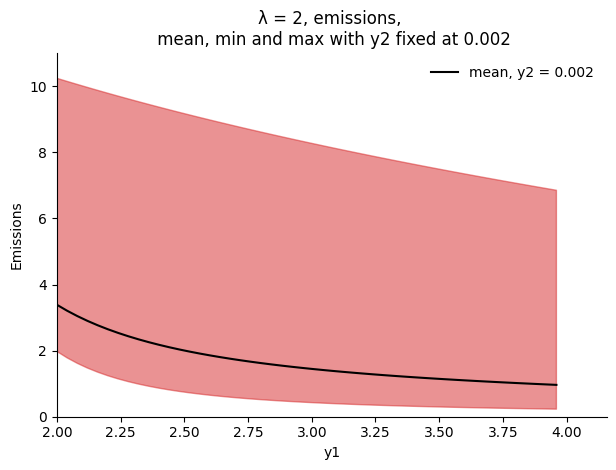

In [113]:
plt.plot(y1_grid, np.mean(e_list_2[:, :, 2], axis=0), color="black", label="mean, y2 = {}".format(y2_grid[2]))
plt.fill_between(y1_grid, np.max(e_list_2, axis=0)[:, 2], np.min(e_list_2, axis=0)[:, 2], color="tab:red", alpha=0.5)
plt.title("λ = 2, emissions, \n mean, min and max with y2 fixed at {}".format(y2_grid[2]))
plt.xlabel("y1")
plt.ylabel("Emissions")
plt.legend()
plt.tight_layout()
plt.xlim(2,)
plt.ylim(0, 11)
# plt.savefig("e_2")
plt.show()

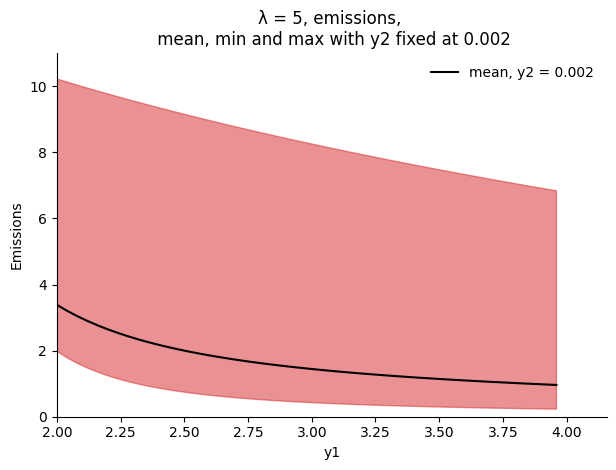

In [114]:
plt.plot(y1_grid, np.mean(e_list_5[:, :, 2], axis=0), color="black", label="mean, y2 = {}".format(y2_grid[2]))
plt.fill_between(y1_grid, np.max(e_list_5, axis=0)[:, 2], np.min(e_list_5, axis=0)[:, 2], color="tab:red", alpha=0.5)
plt.title("λ = 5, emissions, \n mean, min and max with y2 fixed at {}".format(y2_grid[2]))
plt.xlabel("y1")
plt.ylabel("Emissions")
plt.legend()
plt.tight_layout()
plt.xlim(2,)
plt.ylim(0, 11)
# plt.savefig("e_5")
plt.show()

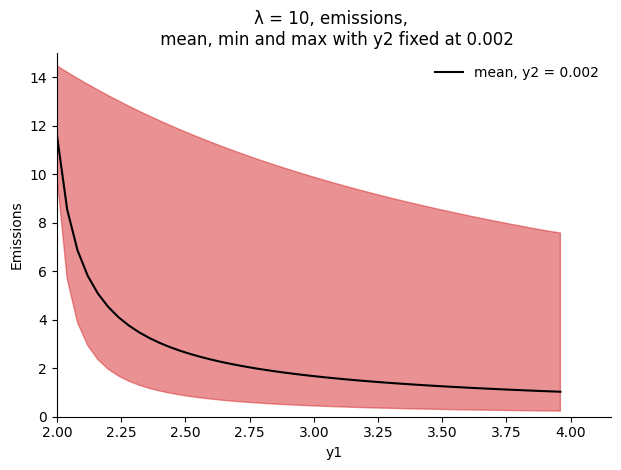

In [115]:
plt.plot(y1_grid, np.mean(e_list_10[:, :, 2], axis=0), color="black", label="mean, y2 = {}".format(y2_grid[2]))
plt.fill_between(y1_grid, np.max(e_list_10, axis=0)[:, 2], np.min(e_list_10, axis=0)[:, 2], color="tab:red", alpha=0.5)
plt.title("λ = 10, emissions, \n mean, min and max with y2 fixed at {}".format(y2_grid[2]))
plt.xlabel("y1")
plt.ylabel("Emissions")
plt.legend()
plt.tight_layout()
plt.xlim(2,)
plt.ylim(0,15)
# plt.savefig("e_10")
plt.show()

In [19]:
i_over_k = 0.09
α = 0.115
αₖ = - 0.043
σₖ = 0.0095
κ = 6.667
k0 = 85/α
C0 = (α - i_over_k)*k0

In [20]:
# simulate
def simulate_logkapital(invkap, αₖ,  σₖ, κ, k0, T=100, dt=1):
    periods = int(T/dt)
    Kt = np.zeros(periods)
    i = invkap
     # log capital
    Kt[0] = np.log(k0)
    k = np.log(k0)
    for t in range(periods-1):
        k +=   (αₖ + i - κ/2*i**2 - .5*σₖ**2)*dt
        Kt[t+1] = k
    return Kt

Kt = simulate_logkapital(i_over_k, αₖ, σₖ, κ,  k0, T=101)

In [21]:
def simulation(y1_grid, y2_grid, e_grid, λ, θ=1.86/1000., y1_0=1.1, y2_0=1.86/1000, T=100):
    e_fun = interpolate.interp2d(y1_grid, y2_grid, e_grid.T)
    Et = np.zeros(T+1)
    y1t = np.zeros(T+1)
    y2t = np.zeros(T+1)
    for i in range(T+1):
#         y2_0 = max(y2_0, 0)
#         y2_0 = min(y2_0, 0.05)
        Et[i] = e_fun(y1_0, y2_0)
        y1t[i] = y1_0
        y2t[i] = y2_0
        y2_0 = np.exp(-λ)*y2_0 + (1 - np.exp(-λ))*θ*Et[i] 
#         y2_0 = max(y2_0, 0)
        y1_0 = y1_0 + y2_0
    return Et, y1t, y2t

In [22]:
import pandas as pd

In [23]:
# parameters
δ = 0.01
η = 0.032
ξa = 0.01
θ_list = pd.read_csv("../data/model144.csv", header=None)[0].to_numpy()
θ_list = θ_list/1000
θ = np.mean(θ_list)
σy = 1.2*θ
# damage function
ȳ = 2
γ1 = 0.00017675
γ2 = 2*0.0022
γ3_list = np.linspace(0., 1./3, 20)
# y grid
# λ = np.log(2)/6

In [24]:
plt.figure(figsize=(24,5))
plt.suptitle("Mean, min and max of post jump emissions")
T = 100
et_list = np.zeros((len(γ3_list), T+1))
y1t_list = np.zeros((len(γ3_list), T+1))
y2t_list = np.zeros((len(γ3_list), T+1))
for i in range(len(γ3_list)):
    et_list[i], y1t_list[i], y2t_list[i] = simulation(y1_grid, y2_grid, e_list_2[i], 2, y1_0=2, y2_0=np.mean(θ_list)) 

plt.subplot(131)
plt.plot(np.mean(et_list, axis=0), color="black")
plt.fill_between(np.arange(T+1), np.max(et_list, axis=0), np.min(et_list, axis=0), color="tab:red", alpha=.5)
plt.ylim(0)
plt.xlabel("Years")
plt.ylabel("Emissions")
plt.title("λ=2")
# plt.show()


plt.subplot(132)
T = 100
et_list = np.zeros((len(γ3_list), T+1))
y1t_list = np.zeros((len(γ3_list), T+1))
y2t_list = np.zeros((len(γ3_list), T+1))
for i in range(len(γ3_list)):
    et_list[i], y1t_list[i], y2t_list[i] = simulation(y1_grid, y2_grid, e_list_5[i], 5, y1_0=2, y2_0=np.mean(θ_list))
    
plt.plot(np.mean(et_list, axis=0), color="black")
plt.fill_between(np.arange(T+1), np.max(et_list, axis=0), np.min(et_list, axis=0), color="tab:red", alpha=.5)
plt.ylim(0)
plt.xlabel("Years")
plt.ylabel("Emissions")
plt.title("λ=5")
# plt.show()  

plt.subplot(133)
T = 100
et_list = np.zeros((len(γ3_list), T+1))
y1t_list = np.zeros((len(γ3_list), T+1))
y2t_list = np.zeros((len(γ3_list), T+1))
for i in range(len(γ3_list)):
    et_list[i], y1t_list[i], y2t_list[i] = simulation(y1_grid, y2_grid, e_list_10[i], 10, y1_0=2, y2_0=np.mean(θ_list))
    
plt.plot(np.mean(et_list, axis=0), color="black")
plt.fill_between(np.arange(T+1), np.max(et_list, axis=0), np.min(et_list, axis=0), color="tab:red", alpha=.5)
plt.ylim(0)
plt.xlabel("Years")
plt.ylabel("Emissions")
plt.title("λ=10")
plt.tight_layout()
# plt.savefig("es_post_jump")
plt.show()  

ValueError: x and y must have equal lengths for non rectangular grid

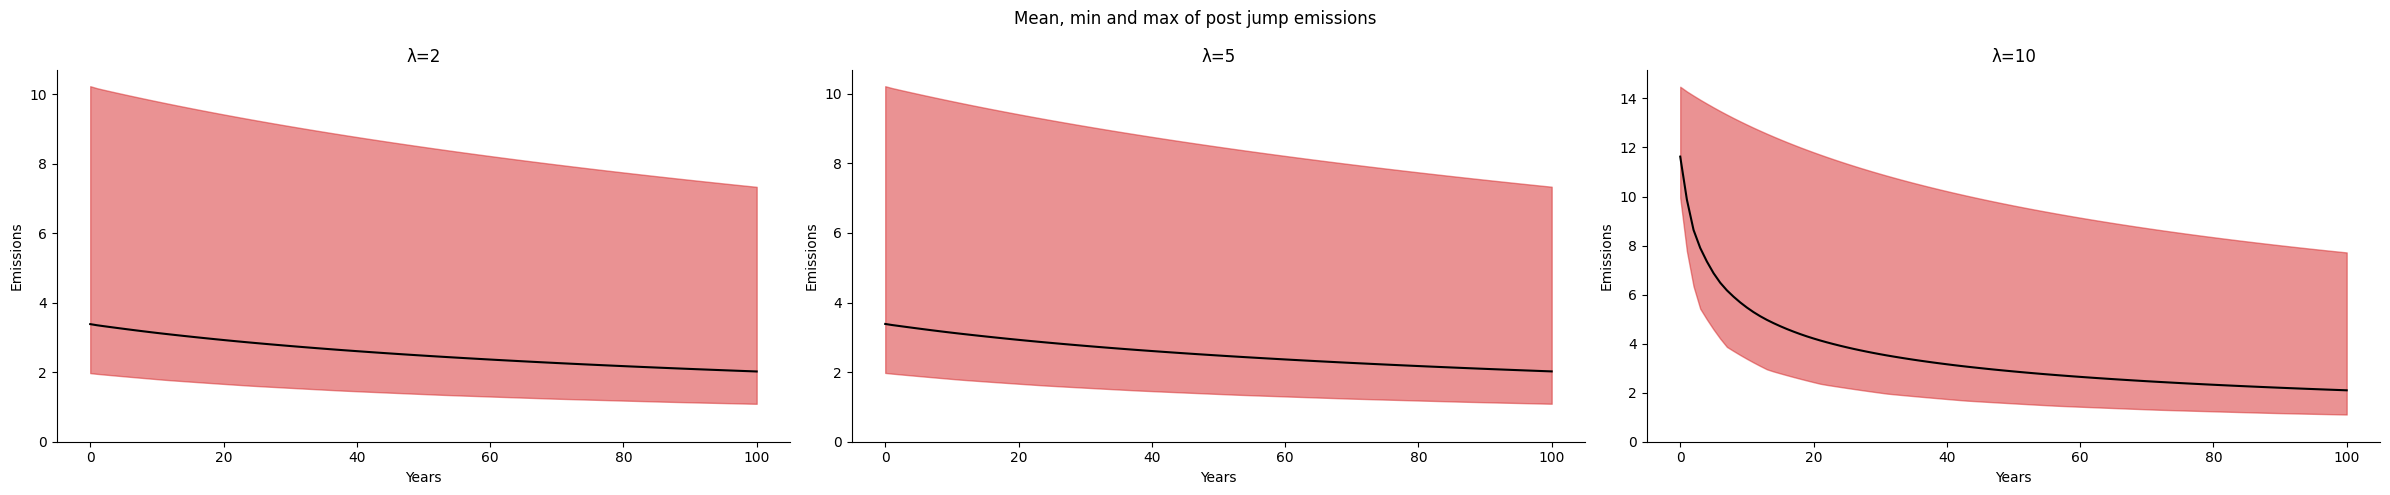

In [199]:
plt.figure(figsize=(24,5))
plt.suptitle("Mean, min and max of post jump emissions")
T = 100
et_list = np.zeros((len(γ3_list), T+1))
y1t_list = np.zeros((len(γ3_list), T+1))
y2t_list = np.zeros((len(γ3_list), T+1))
for i in range(len(γ3_list)):
    et_list[i], y1t_list[i], y2t_list[i] = simulation(y1_grid, y2_grid, e_list_2[i], 2, y1_0=2, y2_0=np.mean(θ_list)) 

plt.subplot(131)
plt.plot(γ3_list, et_list[i] color="black")
plt.fill_between(np.arange(T+1), np.max(et_list, axis=0), np.min(et_list, axis=0), color="tab:red", alpha=.5)
plt.ylim(0)
plt.xlabel("Years")
plt.ylabel("Emissions")
plt.title("λ=2")
# plt.show()


plt.subplot(132)
T = 100
et_list = np.zeros((len(γ3_list), T+1))
y1t_list = np.zeros((len(γ3_list), T+1))
y2t_list = np.zeros((len(γ3_list), T+1))
for i in range(len(γ3_list)):
    et_list[i], y1t_list[i], y2t_list[i] = simulation(y1_grid, y2_grid, e_list_5[i], 5, y1_0=2, y2_0=np.mean(θ_list))
    
plt.plot(np.mean(et_list, axis=0), color="black")
plt.fill_between(np.arange(T+1), np.max(et_list, axis=0), np.min(et_list, axis=0), color="tab:red", alpha=.5)
plt.ylim(0)
plt.xlabel("Years")
plt.ylabel("Emissions")
plt.title("λ=5")
# plt.show()  

plt.subplot(133)
T = 100
et_list = np.zeros((len(γ3_list), T+1))
y1t_list = np.zeros((len(γ3_list), T+1))
y2t_list = np.zeros((len(γ3_list), T+1))
for i in range(len(γ3_list)):
    et_list[i], y1t_list[i], y2t_list[i] = simulation(y1_grid, y2_grid, e_list_10[i], 10, y1_0=2, y2_0=np.mean(θ_list))
    
plt.plot(np.mean(et_list, axis=0), color="black")
plt.fill_between(np.arange(T+1), np.max(et_list, axis=0), np.min(et_list, axis=0), color="tab:red", alpha=.5)
plt.ylim(0)
plt.xlabel("Years")
plt.ylabel("Emissions")
plt.title("λ=10")
plt.tight_layout()
# plt.savefig("es_post_jump")
plt.show()  

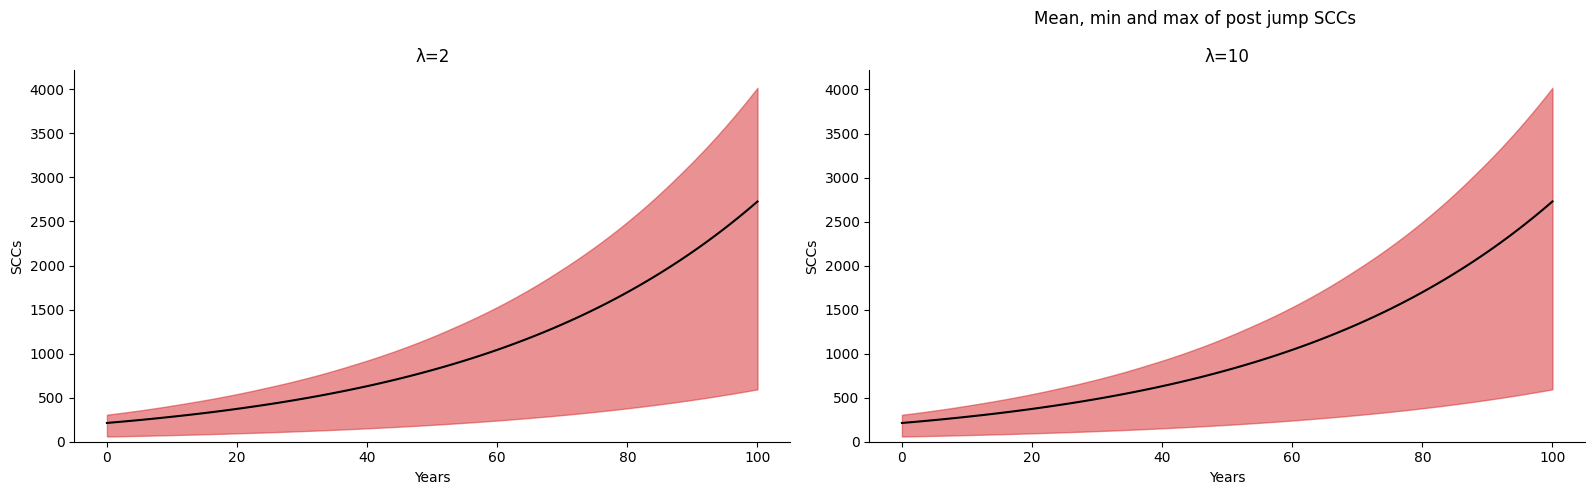

In [27]:
plt.figure(figsize=(24,5))
plt.suptitle("Mean, min and max of post jump SCCs")
T = 100
et_list = np.zeros((len(γ3_list), T+1))
y1t_list = np.zeros((len(γ3_list), T+1))
y2t_list = np.zeros((len(γ3_list), T+1))
for i in range(len(γ3_list)):
    et_list[i], y1t_list[i], y2t_list[i] = simulation(y1_grid, y2_grid, e_list_2[i], 2, y1_0=2, y2_0=np.mean(θ_list)) 


logN_list = np.zeros((len(γ3_list), T+1))
SCC_list = np.zeros((len(γ3_list), T+1))
for i in range(len(γ3_list)):
    logN_list[i] = γ1 * y1t_list[i] + γ2/2 * y1t_list[i]**2 + γ3_list[i]/2*(y1t_list[i] - 2)**2*(y1t_list[i]>2) 
    SCC_list[i] = η * (α - i_over_k)*np.exp(Kt) / (1 - η) / np.exp(logN_list[i]) /et_list[i] * 1000
plt.subplot(131)
plt.plot(np.mean(SCC_list, axis=0), color="black")
plt.fill_between(np.arange(T+1), np.max(SCC_list, axis=0), np.min(SCC_list, axis=0), color="tab:red", alpha=.5)

plt.ylim(0)
plt.xlabel("Years")
plt.ylabel("SCCs")
plt.title("λ=2")
# plt.show()


plt.subplot(132)
T = 100
et_list = np.zeros((len(γ3_list), T+1))
y1t_list = np.zeros((len(γ3_list), T+1))
y2t_list = np.zeros((len(γ3_list), T+1))
for i in range(len(γ3_list)):
    et_list[i], y1t_list[i], y2t_list[i] = simulation(y1_grid, y2_grid, e_list_5[i], 2, y1_0=2, y2_0=np.mean(θ_list))
    
logN_list = np.zeros((len(γ3_list), T+1))
SCC_list = np.zeros((len(γ3_list), T+1))
for i in range(len(γ3_list)):
    logN_list[i] = γ1 * y1t_list[i] + γ2/2 * y1t_list[i]**2 + γ3_list[i]/2*(y1t_list[i] - 2)**2*(y1t_list[i]>2) 
    SCC_list[i] = η * (α - i_over_k)*np.exp(Kt)/ (1 - η) / np.exp(logN_list[i]) /et_list[i] * 1000

plt.plot(np.mean(SCC_list, axis=0), color="black")
plt.fill_between(np.arange(T+1), np.max(SCC_list, axis=0), np.min(SCC_list, axis=0), color="tab:red", alpha=.5)
plt.ylim(0)
plt.xlabel("Years")
plt.ylabel("SCCs")
plt.title("λ=5")
# plt.show()  

# plt.subplot(133)
# T = 100
# et_list = np.zeros((len(γ3_list), T+1))
# y1t_list = np.zeros((len(γ3_list), T+1))
# y2t_list = np.zeros((len(γ3_list), T+1))
# for i in range(len(γ3_list)):
#     et_list[i], y1t_list[i], y2t_list[i] = simulation(y1_grid, y2_grid, e_list_10[i], 2, y1_0=2, y2_0=np.mean(θ_list))
    
# logN_list = np.zeros((len(γ3_list), T+1))
# SCC_list = np.zeros((len(γ3_list), T+1))
# for i in range(len(γ3_list)):
#     logN_list[i] = γ1 * y1t_list[i] + γ2/2 * y1t_list[i]**2 + γ3_list[i]/2*(y1t_list[i] - 2)**2*(y1t_list[i]>2) 
#     SCC_list[i] = η * (α - i_over_k)*np.exp(Kt) / (1 - η) / np.exp(logN_list[i]) /et_list[i] * 1000

# plt.plot(np.mean(SCC_list, axis=0), color="black")
# plt.fill_between(np.arange(T+1), np.max(SCC_list, axis=0), np.min(SCC_list, axis=0), color="tab:red", alpha=.5)
plt.ylim(0)
plt.xlabel("Years")
plt.ylabel("SCCs")
plt.title("λ=10")
plt.tight_layout()
# plt.savefig("scc_post_jump")
plt.show()  

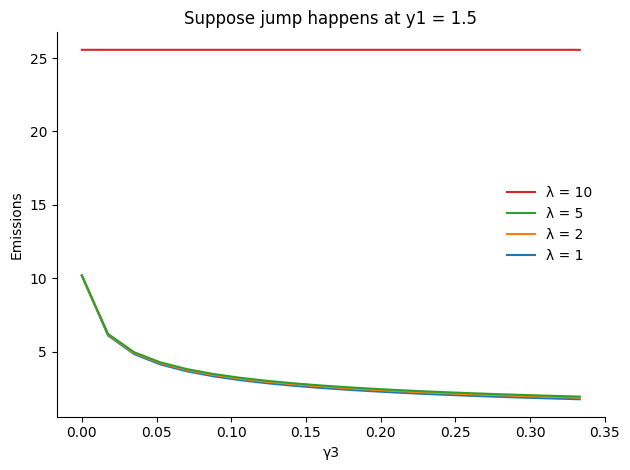

In [28]:
fig, ax = plt.subplots(1, 1)
simul_1 = pickle.load(open("simul_1", "rb"))
loc_y2 = np.abs(simul_1["y1t"] - 1.5).argmin()
e_jump = np.zeros(len(γ3_list))
for i in range(len(γ3_list)):
    loc_e = np.abs(e_list_1[i, 50, :] - simul_1["y2t"][loc_y2]).argmin()
    e_jump[i] = e_list_1[i, 50, loc_e]

plt.plot(γ3_list, e_jump, label="λ = 1")

simul_2 = pickle.load(open("simul_2", "rb"))
loc_y2 = np.abs(simul_2["y1t"] - 1.5).argmin()
e_jump = np.zeros(len(γ3_list))
for i in range(len(γ3_list)):
    loc_e = np.abs(e_list_2[i, 50, :] - simul_2["y2t"][loc_y2]).argmin()
    e_jump[i] = e_list_2[i, 50, loc_e]

plt.plot(γ3_list, e_jump, label="λ = 2")

simul_5 = pickle.load(open("simul_5", "rb"))
loc_y2 = np.abs(simul_5["y1t"] - 1.5).argmin()
e_jump = np.zeros(len(γ3_list))
for i in range(len(γ3_list)):
    loc_e = np.abs(e_list_5[i, 50, :] - simul_5["y2t"][loc_y2]).argmin()
    e_jump[i] = e_list_5[i, 50, loc_e]

plt.plot(γ3_list, e_jump, label="λ = 5")

simul_10 = pickle.load(open("simul_10", "rb"))
loc_y2 = np.abs(simul_10["y1t"] - 1.5).argmin()
e_jump = np.zeros(len(γ3_list))
for i in range(len(γ3_list)):
    loc_e = np.abs(e_list_10[i, 50, :] - simul_10["y2t"][loc_y2]).argmin()
    e_jump[i] = e_list_10[i, 50, loc_e]

plt.plot(γ3_list, e_jump, label="λ = 10")

handles, labels = ax.get_legend_handles_labels()
# reverse the order
ax.legend(handles[::-1], labels[::-1])
plt.xlabel("γ3")
plt.ylabel("Emissions")
plt.title("Suppose jump happens at y1 = 1.5")
plt.tight_layout()

# plt.savefig("emission_jump15_4")
plt.show()

In [49]:
# interpolation 
v_funs_2 = [interpolate.interp2d(y1_grid, y2_grid, v_list_2[i].T) for i in range(len(γ3_list))]
v_funs_5 = [interpolate.interp2d(y1_grid, y2_grid, v_list_5[i].T) for i in range(len(γ3_list))]
v_funs_1 = [interpolate.interp2d(y1_grid, y2_grid, v_list_1[i].T) for i in range(len(γ3_list))]


In [62]:
# interpolation 
e_funs_2 = [interpolate.interp2d(y1_grid, y2_grid, e_list_2[i].T) for i in range(len(γ3_list))]
e_funs_5 = [interpolate.interp2d(y1_grid, y2_grid, e_list_5[i].T) for i in range(len(γ3_list))]
e_funs_1 = [interpolate.interp2d(y1_grid, y2_grid, e_list_1[i].T) for i in range(len(γ3_list))]


[3.21917159 2.71411905 2.50371918 2.3740642  2.28235407 2.21249299
 2.15671639 2.11070594 2.07182429 2.03834929 2.00909841 1.98322731
 1.96011315 1.93928516 1.92037908 1.90310755 1.8872411  1.8725934
 1.8590112  1.8463671 ]
[3.21142779 2.70948449 2.50093114 2.37265911 2.28207743 2.21318096
 2.1582537  2.11300668 2.07482185 2.04199037 2.01333945 1.98803181
 1.96545035 1.94512869 1.92670574 1.90989737 1.89447634 1.88025813
 1.86709109 1.85484921]
[3.20417664 2.70470127 2.49752525 2.37025447 2.28047212 2.21224656
 2.15790054 2.11316829 2.07544689 2.04303776 2.01477582 1.98982917
 1.96758528 1.94758075 1.92945753 1.91293364 1.89778354 1.88382418
 1.87090527 1.85890193]


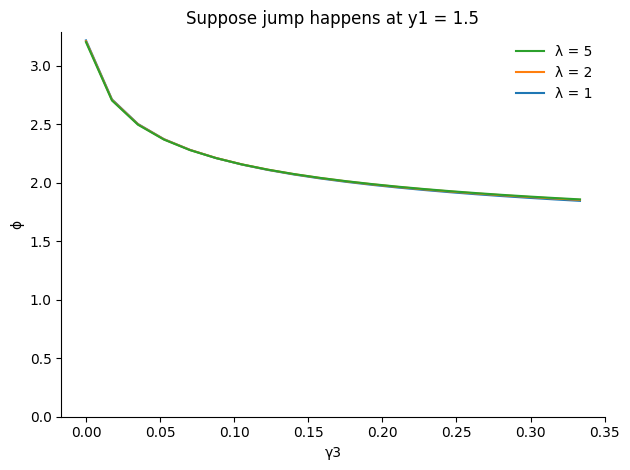

In [76]:
fig, ax = plt.subplots(1, 1)
simul_1 = pickle.load(open("simul_1", "rb"))
loc_y2 = np.abs(simul_1["y1t"] - 1.5).argmin()
v_jump = np.zeros(len(γ3_list))
for i in range(len(γ3_list)):
    v_jump[i] = v_funs_1[i](1.5, simul_1["y2t"][loc_y2])

plt.plot(γ3_list, v_jump , label="λ = 1")
print(v_jump)
simul_2 = pickle.load(open("simul_2", "rb"))
loc_y2 = np.abs(simul_2["y1t"] - 1.5).argmin()
v_jump = np.zeros(len(γ3_list))
for i in range(len(γ3_list)):
    v_jump[i] = v_funs_2[i](1.5, simul_2["y2t"][loc_y2])

plt.plot(γ3_list, v_jump , label="λ = 2")
print(v_jump)
simul_5 = pickle.load(open("simul_5", "rb"))
loc_y2 = np.abs(simul_5["y1t"] - 1.5).argmin()
v_jump = np.zeros(len(γ3_list))
for i in range(len(γ3_list)):
    v_jump[i] = v_funs_5[i](1.5, simul_5["y2t"][loc_y2])

plt.plot(γ3_list, v_jump , label="λ = 5")
print(v_jump)
# simul_10 = pickle.load(open("simul_10", "rb"))
# loc_y2 = np.abs(simul_10["y1t"] - 1.5).argmin()
# v_jump = np.zeros(len(γ3_list))
# for i in range(len(γ3_list)):
#     v_jump[i] = v_funs_1[i](1.5, simul_5["y2t"][loc_y2])

# plt.plot(γ3_list, v_jump, label="λ = 5")

handles, labels = ax.get_legend_handles_labels()
# reverse the order
ax.legend(handles[::-1], labels[::-1])
plt.xlabel("γ3")
plt.ylabel("ϕ")
plt.title("Suppose jump happens at y1 = 1.5")
# plt.xlim(0.15)
plt.ylim(0)
plt.tight_layout()

# plt.savefig("v_jump15")
plt.show()

[11.58774851  8.19090932  7.11693906  6.5263058   6.13691942  5.85476539
  5.63795628  5.46453727  5.32169681  5.2013839   5.09824811  5.00856705
  4.92964701  4.8595195   4.7966701   4.73991153  4.68833905  4.64121781
  4.59794665  4.55802574]
[11.53987739  8.15638501  7.08769282  6.50014922  6.1128707   5.83227959
  5.61668849  5.44424935  5.30222596  5.18259434  5.08004936  4.99087175
  4.91240191  4.84267275  4.78017018  4.72373256  4.67245427  4.62560067
  4.58257105  4.54287213]
[11.51831311  8.14615301  7.08107518  6.49561849  6.10979428  5.83031052
  5.61561343  5.44392049  5.30253479  5.1834671   5.08141712  4.99268664
  4.91462293  4.84526016  4.78309904  4.72697953  4.67599496  4.62941373
  4.58664061  4.5471852 ]


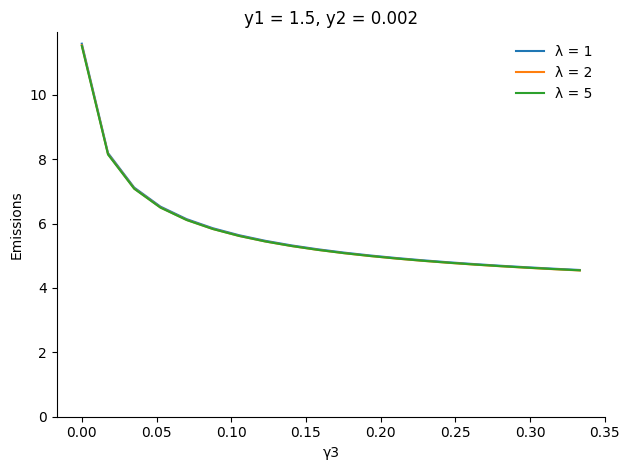

In [82]:
fig, ax = plt.subplots(1, 1)
simul_1 = pickle.load(open("simul_1", "rb"))
loc_y2 = np.abs(simul_1["y1t"] - 1.5).argmin()
e_jump = np.zeros(len(γ3_list))
for i in range(len(γ3_list)):
    e_jump[i] = e_funs_1[i](1.5, 0.002)

plt.plot(γ3_list, e_jump , label="λ = 1")
print(e_jump)
simul_2 = pickle.load(open("simul_2", "rb"))
loc_y2 = np.abs(simul_2["y1t"] - 1.5).argmin()
e_jump = np.zeros(len(γ3_list))
for i in range(len(γ3_list)):
    e_jump[i] = e_funs_2[i](1.5, 0.002)

plt.plot(γ3_list, e_jump , label="λ = 2")
print(e_jump)
simul_5 = pickle.load(open("simul_5", "rb"))
loc_y2 = np.abs(simul_5["y1t"] - 1.5).argmin()
e_jump = np.zeros(len(γ3_list))
for i in range(len(γ3_list)):
    e_jump[i] = e_funs_5[i](1.5, 0.002)

plt.plot(γ3_list, e_jump , label="λ = 5")
print(e_jump)
# simul_10 = pickle.load(open("simul_10", "rb"))
# loc_y2 = np.abs(simul_10["y1t"] - 1.5).argmin()
# e_jump = np.zeros(len(γ3_list))
# for i in range(len(γ3_list)):
#     e_jump[i] = e_funs_1[i](1.5, simul_5["y2t"][loc_y2])

# plt.plot(γ3_list, e_jump, label="λ = 5")

# handles, labels = ax.get_legend_handles_labels()
# # reverse the order
# ax.legend(handles[::-1], labels[::-1])
plt.legend()
plt.xlabel("γ3")
plt.ylabel("Emissions")
plt.title("y1 = 1.5, y2 = 0.002")
# plt.xlim(0.15)
plt.ylim(0)
# plt.xlim(0,0.05)
plt.tight_layout()

# plt.savefig("e_jump15")
plt.show()

In [83]:
γ3_list[1]

0.017543859649122806

In [77]:
simul_2 = pickle.load(open("simul_2", "rb"))
loc_y2 = np.abs(simul_2["y1t"] - 1.5).argmin()
e_jump = np.zeros(len(γ3_list))
for i in range(len(γ3_list)):
    loc_e = np.abs(e_list_2[i, 50, :] - simul_2["y2t"][loc_y2]).argmin()
    e_jump[i] = e_list_2[i, 50, loc_e]
    
simul_2["y2t"][loc_y2]

0.007173425631827591

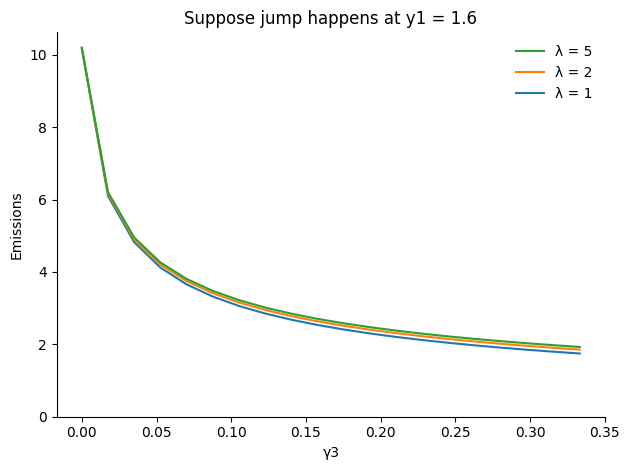

In [78]:
fig, ax = plt.subplots(1, 1)
simul_1 = pickle.load(open("simul_1", "rb"))
loc_y2 = np.abs(simul_1["y1t"] - 1.6).argmin()
e_jump = np.zeros(len(γ3_list))
for i in range(len(γ3_list)):
    loc_e = np.abs(e_list_1[i, 50, :] - simul_1["y2t"][loc_y2]).argmin()
    e_jump[i] = e_list_1[i, 50, loc_e]

plt.plot(γ3_list, e_jump, label="λ = 1")

simul_2 = pickle.load(open("simul_2", "rb"))
loc_y2 = np.abs(simul_2["y1t"] - 1.6).argmin()
e_jump = np.zeros(len(γ3_list))
for i in range(len(γ3_list)):
    loc_e = np.abs(e_list_2[i, 50, :] - simul_2["y2t"][loc_y2]).argmin()
    e_jump[i] = e_list_2[i, 50, loc_e]

plt.plot(γ3_list, e_jump, label="λ = 2")

simul_5 = pickle.load(open("simul_5", "rb"))
loc_y2 = np.abs(simul_5["y1t"] - 1.6).argmin()
e_jump = np.zeros(len(γ3_list))
for i in range(len(γ3_list)):
    loc_e = np.abs(e_list_5[i, 50, :] - simul_5["y2t"][loc_y2]).argmin()
    e_jump[i] = e_list_5[i, 50, loc_e]

plt.plot(γ3_list, e_jump, label="λ = 5")

# simul_10 = pickle.load(open("simul_10", "rb"))
# loc_y2 = np.abs(simul_10["y1t"] - 1.6).argmin()
# e_jump = np.zeros(len(γ3_list))
# for i in range(len(γ3_list)):
#     loc_e = np.abs(e_list_10[i, 50, :] - simul_10["y2t"][loc_y2]).argmin()
#     e_jump[i] = e_list_10[i, 50, loc_e]

# plt.plot(γ3_list, e_jump, label="λ = 10")

handles, labels = ax.get_legend_handles_labels()
# reverse the order
ax.legend(handles[::-1], labels[::-1])
plt.xlabel("γ3")
plt.ylabel("Emissions")
plt.title("Suppose jump happens at y1 = 1.6")
plt.ylim(0)
plt.tight_layout()

# plt.savefig("emission_jump16_4")
plt.show()

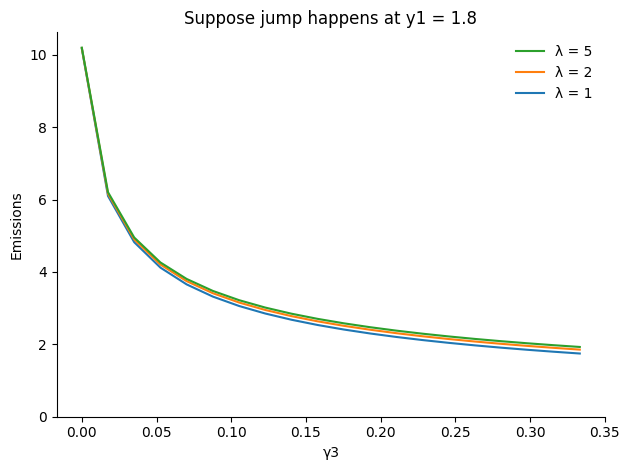

In [37]:
fig, ax = plt.subplots(1, 1)
simul_1 = pickle.load(open("simul_1", "rb"))
loc_y2 = np.abs(simul_1["y1t"] - 1.8).argmin()
e_jump = np.zeros(len(γ3_list))
for i in range(len(γ3_list)):
    loc_e = np.abs(e_list_1[i, 50, :] - simul_1["y2t"][loc_y2]).argmin()
    e_jump[i] = e_list_1[i, 50, loc_e]

plt.plot(γ3_list, e_jump, label="λ = 1")

simul_2 = pickle.load(open("simul_2", "rb"))
loc_y2 = np.abs(simul_2["y1t"] - 1.8).argmin()
e_jump = np.zeros(len(γ3_list))
for i in range(len(γ3_list)):
    loc_e = np.abs(e_list_2[i, 50, :] - simul_2["y2t"][loc_y2]).argmin()
    e_jump[i] = e_list_2[i, 50, loc_e]

plt.plot(γ3_list, e_jump, label="λ = 2")

simul_5 = pickle.load(open("simul_5", "rb"))
loc_y2 = np.abs(simul_5["y1t"] - 1.8).argmin()
e_jump = np.zeros(len(γ3_list))
for i in range(len(γ3_list)):
    loc_e = np.abs(e_list_5[i, 50, :] - simul_5["y2t"][loc_y2]).argmin()
    e_jump[i] = e_list_5[i, 50, loc_e]

plt.plot(γ3_list, e_jump, label="λ = 5")

# simul_10 = pickle.load(open("simul_10", "rb"))
# loc_y2 = np.abs(simul_10["y1t"] - 1.8).argmin()
# e_jump = np.zeros(len(γ3_list))
# for i in range(len(γ3_list)):
#     loc_e = np.abs(e_list_10[i, 50, :] - simul_10["y2t"][loc_y2]).argmin()
#     e_jump[i] = e_list_10[i, 50, loc_e]

# plt.plot(γ3_list, e_jump, label="λ = 10")

handles, labels = ax.get_legend_handles_labels()
# reverse the order
ax.legend(handles[::-1], labels[::-1])
plt.xlabel("γ3")
plt.ylabel("Emissions")
plt.title("Suppose jump happens at y1 = 1.8")
plt.ylim(0)
plt.tight_layout()

# plt.savefig("emission_jump16_4")
plt.show()

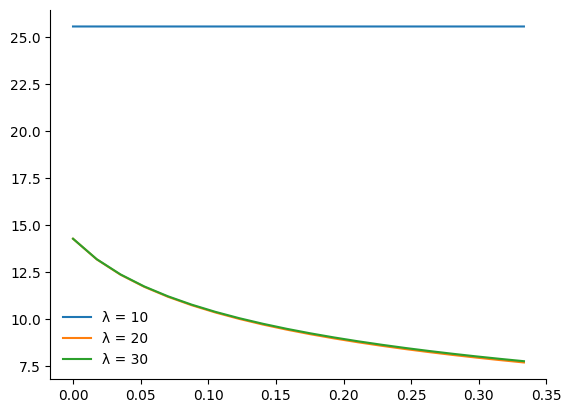

In [29]:
simul_10 = pickle.load(open("simul_10", "rb"))
loc_y2 = np.abs(simul_10["y1t"] - 1.5).argmin()
e_jump = np.zeros(len(γ3_list))
for i in range(len(γ3_list)):
    loc_e = np.abs(e_list_10[i, 50, :] - simul_10["y2t"][loc_y2]).argmin()
    e_jump[i] = e_list_10[i, 50, loc_e]

plt.plot(γ3_list, e_jump, label="λ = 10")


simul_20 = pickle.load(open("simul_20", "rb"))
loc_y2 = np.abs(simul_20["y1t"] - 1.5).argmin()
e_jump = np.zeros(len(γ3_list))
for i in range(len(γ3_list)):
    loc_e = np.abs(e_list_20[i, 50, :] - simul_20["y2t"][loc_y2]).argmin()
    e_jump[i] = e_list_20[i, 50, loc_e]

plt.plot(γ3_list, e_jump, label="λ = 20")

simul_30 = pickle.load(open("simul_30", "rb"))
loc_y2 = np.abs(simul_30["y1t"] - 1.5).argmin()
e_jump = np.zeros(len(γ3_list))
for i in range(len(γ3_list)):
    loc_e = np.abs(e_list_30[i, 50, :] - simul_30["y2t"][loc_y2]).argmin()
    e_jump[i] = e_list_30[i, 50, loc_e]

plt.plot(γ3_list, e_jump, label="λ = 30")

plt.legend()
plt.show()

In [276]:
loc_y2, simul_10["y2t"][loc_y2], loc_e

(12, 0.025998931418063937, 49)

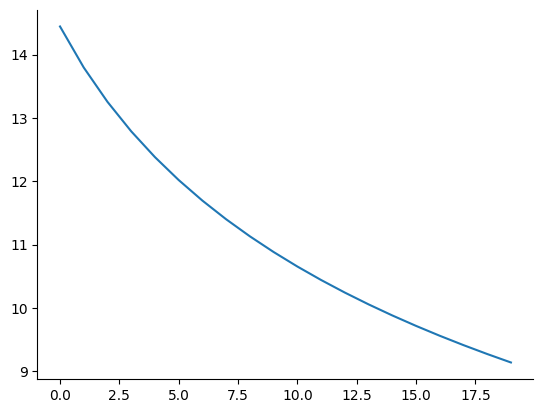

In [275]:
plt.plot(e_list_10[:, 50, 49])
plt.show()

In [220]:
simul_2, 

(array({'et': array([5.33405943, 5.28634863, 5.24709628, 5.20927718, 5.17188371,
        5.13478035, 5.09794728, 5.06139603, 5.02511517, 4.98909621,
        4.95333726, 4.91785356, 4.88264535, 4.84768803, 4.81297988,
        4.77851634, 4.74427   , 4.71027024, 4.67651522, 4.64300315,
        4.60972215, 4.57667094, 4.54385854, 4.51128316, 4.47894306,
        4.44683602, 4.41495857, 4.38330895, 4.35188554, 4.32068675,
        4.28966091, 4.2588558 , 4.228268  , 4.19790002, 4.16775028,
        4.1378881 , 4.10824588, 4.07881271, 4.04958719, 4.02056792,
        3.99279017, 3.96572418, 3.9388073 , 3.91204039, 3.88542313,
        3.86348277, 3.85758287, 3.85166946, 3.84574786, 3.83981589,
        3.83387286, 3.88021603, 3.95659313, 4.03479064, 4.11468481,
        4.19629044, 4.29255113, 4.42739182, 4.56682101, 4.71074851,
        4.85928732, 5.02021792, 5.19459739, 5.3749533 , 5.56141456,
        5.74974506, 5.93575069, 6.12737203, 6.32482758, 6.50094746,
        6.67000862, 6.8428851 , 6.9